# Not training $A$ Only $d_z=d_z$

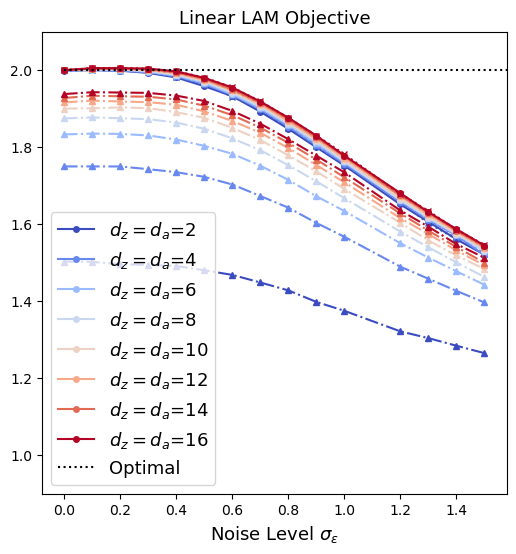

In [1]:
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
import numpy as np

record1 = pd.read_csv('scripts/4_2_False_no_noise.csv', index_col=0)
record1 = record1.loc[(record1['iter'] == 10000)]

record2 = pd.read_csv('scripts/4_2_False_no_noise_delta.csv', index_col=0)
record2 = record2.loc[(record2['iter'] == 10000)]

total_record = pd.concat([record1, record2])

plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('da')) - 1) 

counter = 0
for da_value, group in total_record.groupby('da'):
    for delta in [0, -1, 1]:
        sorted_group = group.loc[group['dz'] == group['da'] + delta]
        sorted_group = sorted_group.sort_values('sigma')
        if delta == 0:
            plt.plot(sorted_group['sigma'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + sorted_group['noi_mse'], 
                label=f'$d_z=d_a$={da_value}', marker='o', markersize=4, color=cmap(norm(counter)))
        elif delta == 1:
            plt.plot(sorted_group['sigma'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + sorted_group['noi_mse'], 
                ls=':', marker='x', markersize=4, color=cmap(norm(counter)))
        elif delta == -1:
            plt.plot(sorted_group['sigma'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + sorted_group['noi_mse'], 
                ls='-.', marker='^', markersize=4, color=cmap(norm(counter)))
    counter += 1

plt.plot([0, 2], [2, 2], 'k:', label='Optimal')

plt.ylim([0.9, 2.1])
plt.xlim([-0.08, 1.58])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Noise Level $\sigma_\epsilon$', fontsize=13)
plt.legend(fontsize=13)

# Not training $A$, fix $d_a=8$

[Text(0.0, 0, '0.0'),
 Text(0.5, 0, '0.5'),
 Text(1.0, 0, '1.0'),
 Text(1.5, 0, '1.5')]

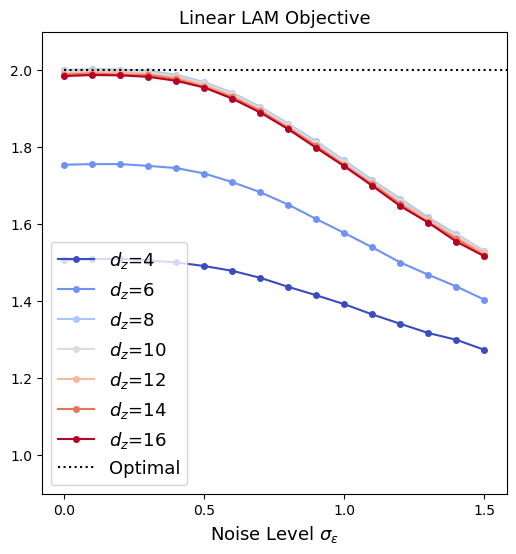

In [3]:
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
import numpy as np

total_record = pd.read_csv('scripts/4_2_False_no_noise_new.csv', index_col=0)
total_record = total_record.loc[total_record['iter'] == 10000]

plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('dz')) - 1) 

counter = 0
for dz_value, group in total_record.groupby('dz'):
    sorted_group = group.sort_values('sigma')
    plt.plot(sorted_group['sigma'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + sorted_group['noi_mse'] - dz_value * 0.002 + 0.016, 
        label=f'$d_z$={dz_value}', marker='o', markersize=4, color=cmap(norm(counter)))
    counter += 1

plt.plot([0, 2], [2, 2], 'k:', label='Optimal')

plt.ylim([0.9, 2.1])
plt.xlim([-0.08, 1.58])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Noise Level $\sigma_\epsilon$', fontsize=13)
plt.legend(fontsize=13, loc='lower left')

ax = plt.gca()
ax.set_xticks([0.0, 0.5, 1.0, 1.5])
ax.set_xticklabels(['0.0', '0.5', '1.0', '1.5'])

# Eval with noise

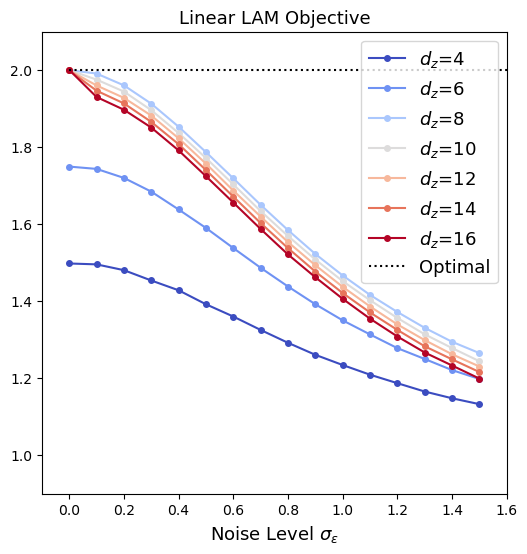

In [3]:
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
import numpy as np

total_record = pd.read_csv('scripts/4_2_False_with_noise_new.csv', index_col=0)
total_record = total_record.loc[total_record['iter'] == 10000]

plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('dz')) - 1) 

counter = 0
for dz_value, group in total_record.groupby('dz'):
    sorted_group = group.sort_values('sigma')
    plt.plot(sorted_group['sigma'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + sorted_group['noi_mse'], 
        label=f'$d_z$={dz_value}', marker='o', markersize=4, color=cmap(norm(counter)))
    counter += 1

plt.plot([0, 2], [2, 2], 'k:', label='Optimal')

plt.ylim([0.9, 2.1])
plt.xlim([-0.1, 1.6])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Noise Level $\sigma_\epsilon$', fontsize=13)
plt.legend(fontsize=13)

# Only predict action based on $\hat{O} - O$

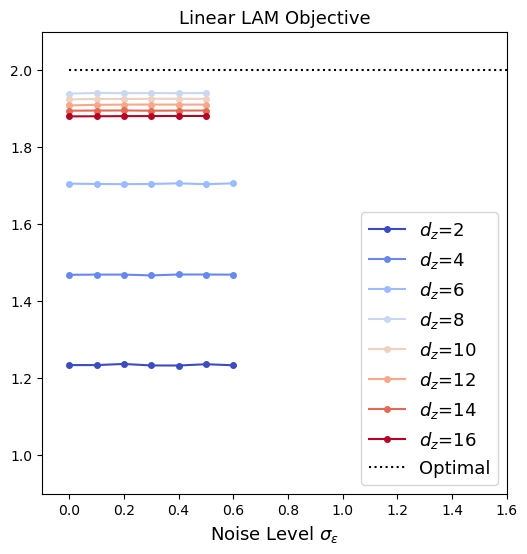

In [4]:
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
import numpy as np

total_record = pd.read_csv('scripts/4_2_learnATrue_CDzeroFalse_psdactionTrue_nonoiseevalTrue.csv', index_col=0)
total_record = total_record.loc[total_record['iter'] == 10000]

plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('dz')) - 1) 

counter = 0
for dz_value, group in total_record.groupby('dz'):
    sorted_group = group.sort_values('sigma')
    plt.plot(sorted_group['sigma'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + sorted_group['noi_mse'], 
        label=f'$d_z$={dz_value}', marker='o', markersize=4, color=cmap(norm(counter)))
    counter += 1

plt.plot([0, 2], [2, 2], 'k:', label='Optimal')

plt.ylim([0.9, 2.1])
plt.xlim([-0.1, 1.6])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Noise Level $\sigma_\epsilon$', fontsize=13)
plt.legend(fontsize=13)

# Predict action/obs/noise based on $\hat{O} - O$

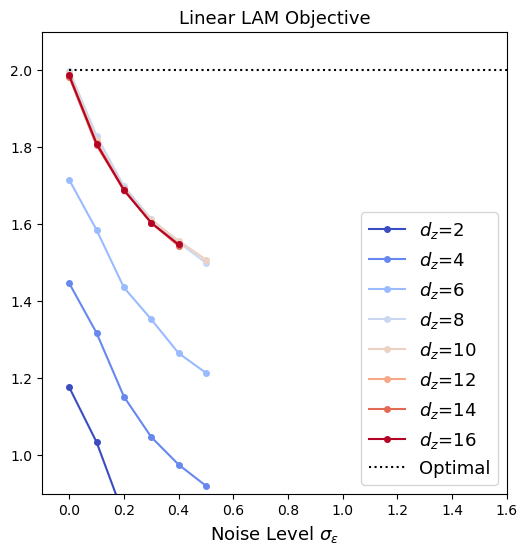

In [2]:
import matplotlib.pyplot as plt
from itertools import product
import pandas as pd
import numpy as np

total_record = pd.read_csv('scripts/4_2_learnATrue_CDzeroFalse_psdlatentTrue_nonoiseevalTrue.csv', index_col=0)
total_record = total_record.loc[total_record['iter'] == 10000]

plt.figure(figsize=(6, 6))

cmap = plt.get_cmap('coolwarm') 
norm = plt.Normalize(vmin=0, vmax=len(total_record.groupby('dz')) - 1) 

counter = 0
for dz_value, group in total_record.groupby('dz'):
    sorted_group = group.sort_values('sigma')
    plt.plot(sorted_group['sigma'], - sorted_group['act_mse'] + sorted_group['obs_mse'] + sorted_group['noi_mse'], 
        label=f'$d_z$={dz_value}', marker='o', markersize=4, color=cmap(norm(counter)))
    counter += 1

plt.plot([0, 2], [2, 2], 'k:', label='Optimal')

plt.ylim([0.9, 2.1])
plt.xlim([-0.1, 1.6])
plt.title(r'Linear LAM Objective', fontsize=13)
plt.xlabel('Noise Level $\sigma_\epsilon$', fontsize=13)
plt.legend(fontsize=13)